##Imports

In [ ]:
#!pip3 install torch torchvision -f https://download.pytorch.org/whl/torch_stable.html

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision.utils import save_image
from torchvision.transforms import ToTensor, Normalize, Compose
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as tt
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split
from torchvision.datasets.utils import download_url
import os
#import cv2
import math
import tarfile
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import FileLink
from IPython.display import Image

In [3]:
torch.__version__

'1.11.0+cu102'

## Tensors Basics

In [ ]:
t1 = torch.tensor(4.)
print(t1)
print(t1.shape)
print(t1.dtype)

tensor(4.)
torch.Size([])
torch.float32


In [ ]:
t2 = torch.tensor([1, 2, 2, 4])
print(t2)
print(t2.shape)
print(t2.dtype)

tensor([1, 2, 2, 4])
torch.Size([4])
torch.int64


In [ ]:
t3 = torch.tensor([[1, 2, 2, 4], [1, 0, 1.0, 34]])
print(t3)
print(t3.shape)
print(t3.dtype)

tensor([[ 1.,  2.,  2.,  4.],
        [ 1.,  0.,  1., 34.]])
torch.Size([2, 4])
torch.float32


In [ ]:
t4 = torch.tensor([[[[1, 2, 2, 0.1], [1, 0, 1, 0.5]], [[0.1, 0.2, 5, 0.004], [1, 2, 3, 0]]], [[[1, 2, 2, 4], [1, 0, 1, 34]], [[0.1, 0.2, 5, 0.004], [1, 2, 3, 0]]]])
print(t4)
print(t4.shape)
print(t4.dtype)

tensor([[[[1.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e-01],
          [1.0000e+00, 0.0000e+00, 1.0000e+00, 5.0000e-01]],

         [[1.0000e-01, 2.0000e-01, 5.0000e+00, 4.0000e-03],
          [1.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00]]],


        [[[1.0000e+00, 2.0000e+00, 2.0000e+00, 4.0000e+00],
          [1.0000e+00, 0.0000e+00, 1.0000e+00, 3.4000e+01]],

         [[1.0000e-01, 2.0000e-01, 5.0000e+00, 4.0000e-03],
          [1.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00]]]])
torch.Size([2, 2, 2, 4])
torch.float32


## Tensors Operations and Gradients

In [ ]:
x = torch.tensor([3., 5])
w = torch.tensor([4., 2] , requires_grad=True)
b = torch.tensor(5. , requires_grad=True)
x, w, b

(tensor([3., 5.]),
 tensor([4., 2.], requires_grad=True),
 tensor(5., requires_grad=True))

In [ ]:
y = torch.dot(w, x) + b
y

tensor(27., grad_fn=<AddBackward0>)

In [ ]:
y.backward()

In [ ]:
print('dy/dx: ', x.grad)
print('dy/dw: ', w.grad)
print('dy/db: ', b.grad)

dy/dx:  None
dy/dw:  tensor([3., 5.])
dy/db:  tensor(1.)


## Tensor Functions

In [ ]:
t5 = torch.full((2, 4), 1)
print(t5)
print(t5.shape)
print(t5.dtype)

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1]])
torch.Size([2, 4])
torch.int64


In [ ]:
t6 = torch.cat((t3, t5))
print(t6)

print(t6.shape)
print(t6.dtype)

tensor([[ 1.,  2.,  2.,  4.],
        [ 1.,  0.,  1., 34.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]])
torch.Size([4, 4])
torch.float32


In [ ]:
t7 = torch.sin(t6)
print(t7)
print(t7.shape)
print(t7.dtype)

tensor([[ 0.8415,  0.9093,  0.9093, -0.7568],
        [ 0.8415,  0.0000,  0.8415,  0.5291],
        [ 0.8415,  0.8415,  0.8415,  0.8415],
        [ 0.8415,  0.8415,  0.8415,  0.8415]])
torch.Size([4, 4])
torch.float32


In [ ]:
t8 = t7.reshape(2, 2, 4)
print(t8)
print(t8.shape)
print(t8.dtype)

tensor([[[ 0.8415,  0.9093,  0.9093, -0.7568],
         [ 0.8415,  0.0000,  0.8415,  0.5291]],

        [[ 0.8415,  0.8415,  0.8415,  0.8415],
         [ 0.8415,  0.8415,  0.8415,  0.8415]]])
torch.Size([2, 2, 4])
torch.float32


## Interoperability with Numpy

In [ ]:
import numpy as np

x = np.array([[1, 2], [3, 4.]])
print(x)
print(x.shape)
print(x.dtype)

[[1. 2.]
 [3. 4.]]
(2, 2)
float64


In [ ]:
y = torch.from_numpy(x)
print(y)
print(y.shape)
print(y.dtype)

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)
torch.Size([2, 2])
torch.float64


In [ ]:
y

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

In [ ]:
z = y.numpy()
print(z)

[[1. 2.]
 [3. 4.]]


In [ ]:
z

array([[1., 2.],
       [3., 4.]])

## Linear Regression

In [ ]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [ ]:
inputs.shape

(5, 3)

In [ ]:
# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

In [ ]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [ ]:
#weights and biases
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[-0.2437,  0.5820, -0.1718],
        [ 0.2615,  0.0901, -1.5514]], requires_grad=True)
tensor([-0.3106,  1.0826], requires_grad=True)


In [ ]:
def LinearReg(x):
  return x @ w.t() + b

In [ ]:
preds = LinearReg(inputs)
print(preds)

tensor([[ 13.5057, -40.5055],
        [ 17.7330, -66.4869],
        [ 46.5126, -54.0818],
        [ -6.4997, -25.7758],
        [ 26.7198, -80.8273]], grad_fn=<AddBackward0>)


In [ ]:
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [ ]:
#MSE
def MSE(t1, t2):
  diff = t1 - t2
  return torch.sum(diff * diff)/diff.numel()

In [ ]:
#compute loss
loss = MSE(preds, targets)
print(loss)

tensor(13682.8496, grad_fn=<DivBackward0>)


In [ ]:
#Compute gradients
loss.backward()

In [ ]:
#gradients for weights
print(w)
print(w.grad)

tensor([[-0.2437,  0.5820, -0.1718],
        [ 0.2615,  0.0901, -1.5514]], requires_grad=True)
tensor([[ -4667.2178,  -5335.2622,  -3294.9431],
        [-11955.1084, -13818.8916,  -8526.4521]])


In [ ]:
#gradients for biases
print(b)
print(b.grad)

tensor([-0.3106,  1.0826], requires_grad=True)
tensor([ -56.6057, -145.5355])


In [ ]:
# Adjust weights & reset gradients
with torch.no_grad():
  w -= w.grad * 1e-5
  b -= b.grad * 1e-5
  w.grad.zero_()
  b.grad.zero_()

In [ ]:
#resetting the grad values
#w.grad.zero_()
#b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


In [ ]:
# Calculate loss
preds = LinearReg(inputs)
loss = MSE(preds, targets)
print(loss)

tensor(9424.0303, grad_fn=<DivBackward0>)


In [ ]:
# Train for 100 epochs
for i in range(1000):
    preds = LinearReg(inputs)
    loss = MSE(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [ ]:
preds = LinearReg(inputs)
loss = MSE(preds, targets)
print(loss)
print(preds)
print(targets)

tensor(1.7866, grad_fn=<DivBackward0>)
tensor([[ 56.9342,  70.6725],
        [ 81.7917,  99.6698],
        [118.7894, 134.3872],
        [ 20.9783,  38.1509],
        [101.2861, 116.9695],
        [ 55.6841,  69.5688],
        [ 81.5992,  99.6169],
        [119.0601, 134.8965],
        [ 22.2284,  39.2546],
        [102.3438, 118.0202],
        [ 56.7417,  70.6195],
        [ 80.5415,  98.5662],
        [118.9819, 134.4402],
        [ 19.9206,  37.1002],
        [102.5363, 118.0732]], grad_fn=<AddBackward0>)
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])


In [ ]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [ ]:
print(inputs.shape)
print(targets.shape)

torch.Size([15, 3])
torch.Size([15, 2])


In [ ]:
train_ds = TensorDataset(inputs, targets)

In [ ]:
train_ds[0:1]

(tensor([[73., 67., 43.]]), tensor([[56., 70.]]))

In [ ]:
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [ ]:
for xb, yb in train_dl:
  print(xb)
  print(yb)
  #break

tensor([[ 68.,  97.,  70.],
        [ 91.,  87.,  65.],
        [ 92.,  87.,  64.],
        [ 88., 134.,  59.],
        [ 69.,  96.,  70.]])
tensor([[102., 120.],
        [ 80., 102.],
        [ 82., 100.],
        [118., 132.],
        [103., 119.]])
tensor([[ 73.,  66.,  44.],
        [101.,  44.,  37.],
        [102.,  43.,  37.],
        [ 73.,  67.,  43.],
        [103.,  43.,  36.]])
tensor([[57., 69.],
        [21., 38.],
        [22., 37.],
        [56., 70.],
        [20., 38.]])
tensor([[ 68.,  96.,  71.],
        [ 87., 135.,  57.],
        [ 74.,  66.,  43.],
        [ 87., 134.,  58.],
        [ 91.,  88.,  64.]])
tensor([[104., 118.],
        [118., 134.],
        [ 57.,  69.],
        [119., 133.],
        [ 81., 101.]])


In [ ]:
##nn.Linear
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.1438,  0.3989, -0.1797],
        [ 0.4178, -0.4601,  0.3517]], requires_grad=True)
Parameter containing:
tensor([-0.5716,  0.0751], requires_grad=True)


In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.1438,  0.3989, -0.1797],
         [ 0.4178, -0.4601,  0.3517]], requires_grad=True),
 Parameter containing:
 tensor([-0.5716,  0.0751], requires_grad=True)]

In [ ]:
preds = model(inputs)
preds

tensor([[ 7.9262, 14.8715],
        [ 9.9397, 20.1152],
        [29.9417, -4.8315],
        [-4.7393, 35.9217],
        [15.2165,  9.3517],
        [ 7.3835, 15.7494],
        [ 9.3611, 20.9270],
        [29.6181, -4.0619],
        [-4.1966, 35.0437],
        [15.1806,  9.2855],
        [ 7.3476, 15.6833],
        [ 9.3970, 20.9931],
        [30.5203, -5.6432],
        [-4.7034, 35.9879],
        [15.7592,  8.4738]], grad_fn=<AddmmBackward0>)

In [ ]:
loss_fn = F.mse_loss

In [ ]:
?nn.Linear

In [ ]:
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(6410.5234, grad_fn=<MseLossBackward0>)


In [ ]:
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [ ]:
def fit(num_epochs, model, loss_fn, opt):
  for epoch in range(num_epochs):
    for xb, yb in train_dl:
      pred = model(xb)
      loss = loss_fn(pred, yb)
      loss.backward()
      opt.step()
      opt.zero_grad()

    if(epoch +1) %10 == 0:
      print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [ ]:
fit(100, model, loss_fn, opt)

Epoch [10/100], Loss: 524.9847
Epoch [20/100], Loss: 349.0484
Epoch [30/100], Loss: 241.1664
Epoch [40/100], Loss: 107.0752
Epoch [50/100], Loss: 113.3149
Epoch [60/100], Loss: 66.7134
Epoch [70/100], Loss: 58.0061
Epoch [80/100], Loss: 8.9516
Epoch [90/100], Loss: 28.8061
Epoch [100/100], Loss: 31.8497


## Image Classification with Logistic Regression

In [4]:
#Imports
from torchvision.datasets import MNIST
from torch.utils.data.dataloader import DataLoader

In [ ]:
dataset = MNIST(root='data/', download=True)

In [ ]:
len(dataset)

60000

In [ ]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [ ]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F9D00D9EB90>, 5)

Label:  5


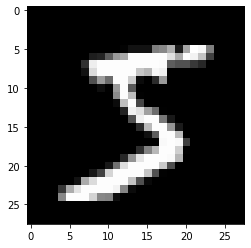

In [ ]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label: ', label)

Label:  3


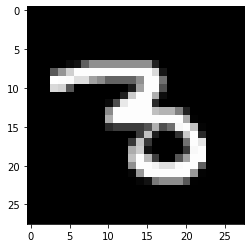

In [ ]:
image, label = dataset[30]
plt.imshow(image, cmap='gray')
print('Label: ', label)

In [ ]:
dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())

In [ ]:
img_tensor, label = dataset[5]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 2


In [ ]:
print(img_tensor[:, 10:15, 10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.9882, 0.9882, 0.8627, 0.6549, 0.1176],
         [0.5020, 0.2275, 0.0863, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.4314, 0.4745],
         [0.0392, 0.2078, 0.7020, 0.9922, 0.9922]]])
tensor(1.) tensor(0.)


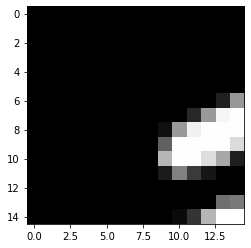

In [ ]:
plt.imshow(img_tensor[0, 0:15, 0:15], cmap='gray')

In [ ]:
def split_indices(n, val_pct):
  n_val = int(val_pct*n)
  idxs = np.random.permutation(n)
  return idxs[n_val:], idxs[:n_val]

In [ ]:
train_indices, val_indices = split_indices(len(dataset), val_pct=0.2)

In [ ]:
print(len(train_indices), len(val_indices))
print('Sample val indices: ', val_indices[:20])

48000 12000
Sample val indices:  [48014 58403 13519 22861  9231 17345 44224 13077 19411  3722  2350 25997
 23335 29667 35102 39919 52040 36133 29403 40056]


In [ ]:
batch_size=100

train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset, batch_size, sampler=train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset, batch_size, sampler=val_sampler)

In [ ]:
len(val_loader)

120

In [ ]:
input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0252, -0.0102,  0.0177,  ..., -0.0286,  0.0332,  0.0352],
         [ 0.0218, -0.0140,  0.0132,  ...,  0.0284, -0.0131,  0.0308],
         [-0.0288,  0.0226, -0.0348,  ...,  0.0086, -0.0194,  0.0302],
         ...,
         [-0.0123, -0.0187, -0.0315,  ..., -0.0119, -0.0149,  0.0041],
         [ 0.0271, -0.0172,  0.0014,  ..., -0.0108, -0.0203, -0.0032],
         [ 0.0355, -0.0352, -0.0012,  ..., -0.0171,  0.0257, -0.0015]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0102,  0.0181,  0.0150,  0.0015, -0.0212, -0.0317,  0.0212, -0.0330,
         -0.0083,  0.0344], requires_grad=True)]

In [ ]:
print(model.weight)
print(model.weight.shape)

Parameter containing:
tensor([[ 0.0252, -0.0102,  0.0177,  ..., -0.0286,  0.0332,  0.0352],
        [ 0.0218, -0.0140,  0.0132,  ...,  0.0284, -0.0131,  0.0308],
        [-0.0288,  0.0226, -0.0348,  ...,  0.0086, -0.0194,  0.0302],
        ...,
        [-0.0123, -0.0187, -0.0315,  ..., -0.0119, -0.0149,  0.0041],
        [ 0.0271, -0.0172,  0.0014,  ..., -0.0108, -0.0203, -0.0032],
        [ 0.0355, -0.0352, -0.0012,  ..., -0.0171,  0.0257, -0.0015]],
       requires_grad=True)
torch.Size([10, 784])


In [ ]:
print(model.bias)
print(model.bias.shape)

Parameter containing:
tensor([ 0.0102,  0.0181,  0.0150,  0.0015, -0.0212, -0.0317,  0.0212, -0.0330,
        -0.0083,  0.0344], requires_grad=True)
torch.Size([10])


In [ ]:
for images, labels in train_loader:
  print(labels.shape)
  images = images.reshape(-1, 784)
  print(images.shape)
  outputs = model(images)
  break

torch.Size([100])
torch.Size([100, 784])


In [ ]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out

model = MnistModel() 

In [ ]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0230,  0.0347, -0.0151,  ...,  0.0071,  0.0267, -0.0180],
         [-0.0007,  0.0057, -0.0346,  ..., -0.0343, -0.0315, -0.0099],
         [-0.0199,  0.0326, -0.0295,  ...,  0.0245, -0.0357,  0.0017],
         ...,
         [ 0.0255,  0.0178,  0.0347,  ...,  0.0090,  0.0189,  0.0024],
         [-0.0356, -0.0196,  0.0259,  ..., -0.0329,  0.0311,  0.0012],
         [-0.0336,  0.0157, -0.0178,  ...,  0.0030,  0.0169, -0.0249]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0303, -0.0015,  0.0246, -0.0216,  0.0180, -0.0045,  0.0107,  0.0026,
         -0.0271, -0.0265], requires_grad=True)]

In [ ]:
for images, labels in train_loader:
  outputs = model(images)
  break

In [ ]:
print('output.shape: ', outputs.shape)
print('Sample output: \n', outputs[:2].data)

output.shape:  torch.Size([100, 10])
Sample output: 
 tensor([[-0.1778, -0.2520,  0.1239,  0.2695, -0.1122, -0.2190,  0.2915, -0.1799,
          0.2315,  0.0700],
        [ 0.0418, -0.3851, -0.0927,  0.1389, -0.1066, -0.1088,  0.7251, -0.0149,
         -0.0236,  0.4594]])


In [ ]:
probs = F.softmax(outputs, dim=1)

print("Sample probabilities: \n", probs[:2].data)

print("Sum: ", torch.sum(probs[0]))

Sample probabilities: 
 tensor([[0.0816, 0.0758, 0.1103, 0.1276, 0.0871, 0.0783, 0.1305, 0.0814, 0.1229,
         0.1045],
        [0.0932, 0.0608, 0.0815, 0.1027, 0.0803, 0.0802, 0.1846, 0.0880, 0.0873,
         0.1415]])
Sum:  tensor(1.0000, grad_fn=<SumBackward0>)


In [ ]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 9, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 9, 6, 9, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 9, 6, 6,
        6, 6, 6, 9, 6, 9, 4, 0, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 6, 6, 6,
        6, 6, 6, 6])
tensor([0.1305, 0.1846, 0.1351, 0.1658, 0.1547, 0.1448, 0.1347, 0.1458, 0.1169,
        0.1540, 0.1535, 0.1452, 0.1740, 0.1446, 0.1635, 0.1698, 0.2083, 0.1402,
        0.1678, 0.1685, 0.1478, 0.1771, 0.1227, 0.1669, 0.1818, 0.1546, 0.1586,
        0.1357, 0.1488, 0.1308, 0.1486, 0.1306, 0.1540, 0.1549, 0.1571, 0.1327,
        0.1546, 0.1503, 0.1690, 0.1403, 0.1483, 0.1491, 0.1448, 0.1545, 0.1464,
        0.1717, 0.1490, 0.1360, 0.1402, 0.1413, 0.1576, 0.1391, 0.1664, 0.1456,
        0.1506, 0.1583, 0.1445, 0.1676, 0.1438, 0.1689, 0.1472, 0.1339, 0.1584,
        0.1531, 0.1255, 0.1649, 0.1462, 0.1230, 0.1430, 0.1648, 0.1352, 0.1261,
        0.1681, 0.1

In [ ]:
print(labels)

tensor([9, 2, 4, 9, 3, 1, 4, 0, 1, 1, 6, 1, 1, 1, 2, 2, 8, 7, 0, 3, 3, 8, 5, 0,
        7, 0, 2, 1, 1, 5, 2, 1, 2, 9, 2, 9, 2, 1, 3, 6, 8, 0, 8, 1, 9, 8, 7, 9,
        1, 0, 3, 6, 4, 2, 7, 0, 5, 3, 3, 7, 8, 5, 1, 7, 9, 5, 6, 2, 8, 3, 3, 1,
        1, 6, 5, 4, 6, 2, 6, 4, 5, 6, 4, 8, 9, 3, 5, 2, 4, 4, 2, 1, 6, 6, 1, 8,
        0, 9, 2, 8])


In [ ]:
def accuracy(l1, l2):
  return torch.sum(l1 == l2).item()/len(l1)

In [ ]:
accuracy(preds, labels)

0.07

In [ ]:
loss_fn = F.cross_entropy

In [ ]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3269, grad_fn=<NllLossBackward0>)


In [ ]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
def loss_batch(model, loss_fn, xb, yb, opt=None, metric=None):
  preds = model(xb)
  loss = loss_fn(preds, yb)

  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()

  metric_result = None
  if metric is not None:
    metric_result = metric(preds, yb)

  return loss.item(), len(xb), metric_result

In [ ]:
def evaluate(model, loss_fn, valid_dl, metric=None):
  with torch.no_grad():
    results = [loss_batch(model, loss_fn, xb, yb, metric=metric) for xb, yb in valid_dl]
    losses, nums, metrics = zip(*results)
    total = np.sum(nums)
    avg_loss = np.sum(np.multiply(losses, nums))/total
    avg_metric = None

    if metric is not None:
      avg_metric = np.sum(np.multiply(metrics, nums))/total
  
  return avg_loss, total, avg_metric

In [ ]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.sum(preds == labels).item()/len(preds)

In [ ]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))

Loss: 2.3199, Accuracy: 0.0808


In [ ]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):
  for epoch in range(epochs):
    #Training
    for xb, yb in train_dl:
      loss, _, _ = loss_batch(model, loss_fn, xb, yb, opt)
    
    #Evaluation
    result = evaluate(model, loss_fn, valid_dl, metric)
    val_loss, total, val_metric = result

    #Print progress
    if metric is None:
      print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, val_loss))

    else:
      print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'.format(epoch+1, epochs, val_loss, metric.__name__, val_metric))

In [ ]:
num_epochs = 20
fit(num_epochs, model, loss_fn, optimizer, train_loader, val_loader, accuracy)

Epoch [1/20], Loss: 1.8820, accuracy: 0.6640
Epoch [2/20], Loss: 1.5827, accuracy: 0.7452
Epoch [3/20], Loss: 1.3721, accuracy: 0.7753
Epoch [4/20], Loss: 1.2206, accuracy: 0.7929
Epoch [5/20], Loss: 1.1083, accuracy: 0.8055
Epoch [6/20], Loss: 1.0223, accuracy: 0.8152
Epoch [7/20], Loss: 0.9547, accuracy: 0.8213
Epoch [8/20], Loss: 0.9001, accuracy: 0.8273
Epoch [9/20], Loss: 0.8551, accuracy: 0.8316
Epoch [10/20], Loss: 0.8174, accuracy: 0.8365
Epoch [11/20], Loss: 0.7852, accuracy: 0.8399
Epoch [12/20], Loss: 0.7574, accuracy: 0.8427
Epoch [13/20], Loss: 0.7332, accuracy: 0.8443
Epoch [14/20], Loss: 0.7119, accuracy: 0.8469
Epoch [15/20], Loss: 0.6929, accuracy: 0.8493
Epoch [16/20], Loss: 0.6759, accuracy: 0.8505
Epoch [17/20], Loss: 0.6606, accuracy: 0.8528
Epoch [18/20], Loss: 0.6467, accuracy: 0.8537
Epoch [19/20], Loss: 0.6340, accuracy: 0.8560
Epoch [20/20], Loss: 0.6225, accuracy: 0.8572


In [ ]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


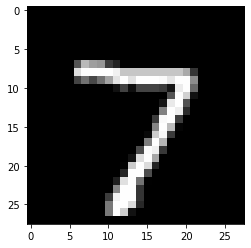

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [ ]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 6 , Predicted: 6


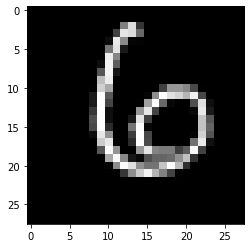

In [ ]:
img, label = test_dataset[100]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 5 , Predicted: 5


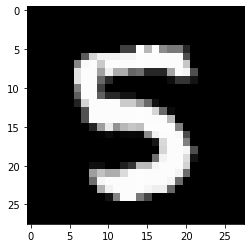

In [ ]:
img, label = test_dataset[120]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, loss_fn, test_loader, accuracy)
result

(0.5942707267284393, 10000, 0.8684)

In [ ]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [ ]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0230,  0.0347, -0.0151,  ...,  0.0071,  0.0267, -0.0180],
                      [-0.0007,  0.0057, -0.0346,  ..., -0.0343, -0.0315, -0.0099],
                      [-0.0199,  0.0326, -0.0295,  ...,  0.0245, -0.0357,  0.0017],
                      ...,
                      [ 0.0255,  0.0178,  0.0347,  ...,  0.0090,  0.0189,  0.0024],
                      [-0.0356, -0.0196,  0.0259,  ..., -0.0329,  0.0311,  0.0012],
                      [-0.0336,  0.0157, -0.0178,  ...,  0.0030,  0.0169, -0.0249]])),
             ('linear.bias',
              tensor([-0.0179,  0.1058, -0.0014, -0.0505,  0.0492,  0.0549, -0.0128,  0.0537,
                      -0.1345, -0.0415]))])

In [ ]:
model2 = MnistModel()

In [ ]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0010,  0.0172,  0.0035,  ...,  0.0255,  0.0099, -0.0034],
                      [ 0.0266, -0.0291, -0.0219,  ...,  0.0338,  0.0113,  0.0288],
                      [-0.0158, -0.0066,  0.0137,  ..., -0.0116,  0.0071,  0.0338],
                      ...,
                      [ 0.0158, -0.0076, -0.0042,  ...,  0.0241, -0.0115,  0.0252],
                      [ 0.0315, -0.0153,  0.0306,  ..., -0.0233, -0.0021, -0.0324],
                      [-0.0060, -0.0224,  0.0284,  ..., -0.0056,  0.0140,  0.0261]])),
             ('linear.bias',
              tensor([-0.0028,  0.0107,  0.0186, -0.0014,  0.0062, -0.0198, -0.0070, -0.0277,
                       0.0310, -0.0254]))])

In [ ]:
evaluate(model2, loss_fn, test_loader, accuracy)

(2.2921402114868163, 10000, 0.1244)

In [ ]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0230,  0.0347, -0.0151,  ...,  0.0071,  0.0267, -0.0180],
                      [-0.0007,  0.0057, -0.0346,  ..., -0.0343, -0.0315, -0.0099],
                      [-0.0199,  0.0326, -0.0295,  ...,  0.0245, -0.0357,  0.0017],
                      ...,
                      [ 0.0255,  0.0178,  0.0347,  ...,  0.0090,  0.0189,  0.0024],
                      [-0.0356, -0.0196,  0.0259,  ..., -0.0329,  0.0311,  0.0012],
                      [-0.0336,  0.0157, -0.0178,  ...,  0.0030,  0.0169, -0.0249]])),
             ('linear.bias',
              tensor([-0.0179,  0.1058, -0.0014, -0.0505,  0.0492,  0.0549, -0.0128,  0.0537,
                      -0.1345, -0.0415]))])

In [ ]:
evaluate(model2, loss_fn, test_loader, accuracy)

(0.5942707267284393, 10000, 0.8684)

## FFNN

In [ ]:
from torchvision.datasets import MNIST
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader

In [ ]:
dataset = MNIST(root='data/', download=True, transform=ToTensor())

image.shape: torch.Size([1, 28, 28])
Label: 5


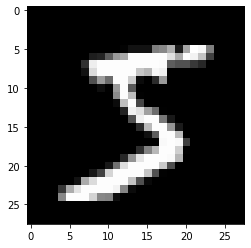

In [ ]:
image, label = dataset[0]
print('image.shape:', image.shape)
plt.imshow(image[0, :, :], cmap='gray')
print('Label:', label)

In [ ]:
val_size = 10000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(50000, 10000)

In [ ]:
batch_size=128

In [ ]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(val_ds, batch_size*2, num_workers=2, pin_memory=True)

images.shape: torch.Size([100, 1, 28, 28])


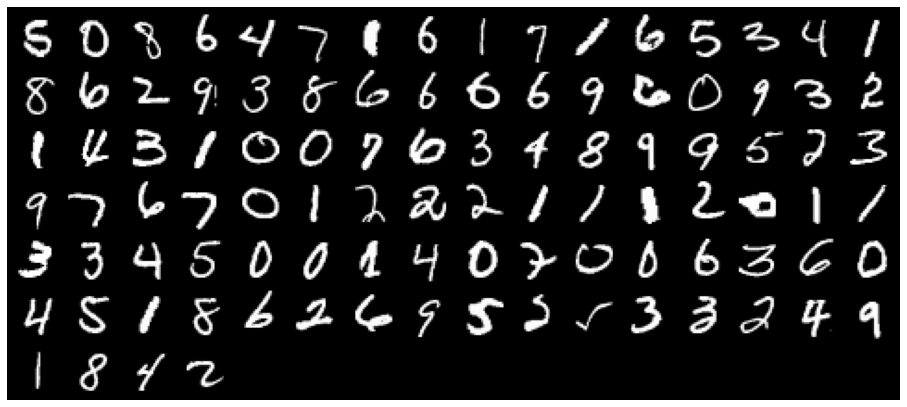

In [ ]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [ ]:
for images, labels in train_loader:
    print('images.shape:', images.shape)
    inputs = images.reshape(-1, 784)
    print('inputs.shape:', inputs.shape)
    break

images.shape: torch.Size([100, 1, 28, 28])
inputs.shape: torch.Size([100, 784])


In [ ]:
input_size = inputs.shape[-1]
hidden_size = 32

In [ ]:
input_size

784

In [ ]:
layer1 = nn.Linear(input_size, hidden_size)

In [ ]:
inputs.shape

torch.Size([100, 784])

In [ ]:
layer1_outputs = layer1(inputs)
print('layer1_outputs.shape:', layer1_outputs.shape)

layer1_outputs.shape: torch.Size([100, 32])


In [ ]:
layer1_outputs_direct = inputs @ layer1.weight.t() + layer1.bias
layer1_outputs_direct.shape

torch.Size([100, 32])

In [ ]:
torch.allclose(layer1_outputs, layer1_outputs_direct)

True

In [ ]:
F.relu(torch.tensor([[1, -1, 0], 
                     [-0.1, .2, 3]]))

tensor([[1.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 3.0000]])

In [ ]:
relu_outputs = F.relu(layer1_outputs)
print('min(layer1_outputs):', torch.min(layer1_outputs).item())
print('min(relu_outputs):', torch.min(relu_outputs).item())

min(layer1_outputs): -0.9242513179779053
min(relu_outputs): 0.0


In [ ]:
output_size = 10
layer2 = nn.Linear(hidden_size, output_size)

In [ ]:
layer2_outputs = layer2(relu_outputs)
print(layer2_outputs.shape)

torch.Size([100, 10])


In [ ]:
inputs.shape

torch.Size([100, 784])

In [ ]:
F.cross_entropy(layer2_outputs, labels)

tensor(2.3115, grad_fn=<NllLossBackward0>)

In [ ]:
# Expanded version of layer2(F.relu(layer1(inputs)))
outputs = (F.relu(inputs @ layer1.weight.t() + layer1.bias)) @ layer2.weight.t() + layer2.bias

In [ ]:
torch.allclose(outputs, layer2_outputs, 1e-5)

True

In [ ]:
# Same as layer2(layer1(inputs))
outputs2 = (inputs @ layer1.weight.t() + layer1.bias) @ layer2.weight.t() + layer2.bias

In [ ]:
# Create a single layer to replace the two linear layers
combined_layer = nn.Linear(input_size, output_size)

combined_layer.weight.data = layer2.weight @ layer1.weight
combined_layer.bias.data = layer1.bias @ layer2.weight.t() + layer2.bias

In [ ]:
# Same as combined_layer(inputs)
outputs3 = inputs @ combined_layer.weight.t() + combined_layer.bias

In [ ]:
torch.allclose(outputs2, outputs3, 1e-3)

True

In [ ]:
class MnistModel(nn.Module):
    """Feedfoward neural network with 1 hidden layer"""
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        # hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        # output layer
        self.linear2 = nn.Linear(hidden_size, out_size)
        
    def forward(self, xb):
        # Flatten the image tensors
        xb = xb.view(xb.size(0), -1)
        # Get intermediate outputs using hidden layer
        out = self.linear1(xb)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear2(out)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
input_size = 784
hidden_size = 32 # you can change this
num_classes = 10

In [ ]:
model = MnistModel(input_size, hidden_size=32, out_size=num_classes)

In [ ]:
for t in model.parameters():
    print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [ ]:
for images, labels in train_loader:
    outputs = model(images)
    loss = F.cross_entropy(outputs, labels)
    print('Loss:', loss.item())
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

Loss: 2.305091142654419
outputs.shape :  torch.Size([100, 10])
Sample outputs :
 tensor([[-0.1163,  0.0612,  0.1251, -0.2405,  0.0088, -0.0505,  0.1396, -0.2513,
          0.1767,  0.2061],
        [-0.1799,  0.0263,  0.0547, -0.1696, -0.0494, -0.0366,  0.1306, -0.1343,
          0.1407,  0.1865]])


In [ ]:
torch.cuda.is_available()

True

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
for images, labels in train_loader:
    print(images.shape)
    images = to_device(images, device)
    print(images.device)
    break

torch.Size([100, 1, 28, 28])
cuda:0


In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [ ]:
for xb, yb in valid_dl:
    print('xb.device:', xb.device)
    print('yb:', yb)
    break

xb.device: cuda:0
yb: tensor([8, 9, 6, 0, 4, 2, 1, 6, 5, 7, 8, 4, 3, 1, 1, 7, 9, 6, 9, 3, 7, 8, 1, 4,
        5, 2, 7, 0, 7, 7, 0, 5, 0, 5, 1, 9, 0, 0, 3, 7, 3, 9, 0, 2, 2, 5, 4, 4,
        7, 6, 5, 9, 9, 6, 5, 5, 3, 5, 9, 0, 9, 4, 4, 7, 7, 0, 4, 6, 2, 0, 6, 7,
        1, 3, 8, 0, 6, 5, 3, 1, 0, 4, 2, 4, 4, 2, 7, 5, 7, 3, 7, 6, 0, 8, 9, 6,
        5, 1, 5, 3, 7, 6, 1, 0, 0, 2, 4, 7, 7, 5, 4, 8, 1, 0, 1, 9, 7, 9, 1, 1,
        7, 5, 0, 1, 3, 9, 6, 9, 9, 3, 4, 3, 3, 1, 0, 5, 5, 8, 9, 0, 8, 5, 0, 5,
        4, 0, 6, 4, 4, 6, 6, 1, 1, 6, 7, 2, 9, 8, 4, 0, 1, 5, 9, 4, 2, 4, 1, 4,
        3, 7, 1, 8, 0, 3, 1, 7, 8, 5, 3, 7, 7, 6, 6, 1, 7, 3, 1, 3, 1, 1, 6, 8,
        0, 4, 5, 2, 5, 4, 6, 5, 1, 2, 2, 5, 4, 5, 7, 7, 1, 9, 4, 8, 5, 0, 2, 5,
        1, 5, 1, 5, 7, 3, 7, 3, 7, 1, 5, 5, 7, 9, 4, 2, 5, 7, 4, 6, 6, 1, 3, 7,
        7, 1, 2, 1, 6, 1, 4, 5, 7, 3, 7, 7, 4, 7, 2, 4], device='cuda:0')


In [ ]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
  #Generate predictions
  preds = model(xb)
  #Calculate loss
  loss = loss_func(preds, yb)

  if opt is not None:
    #Compute gradients
    loss.backward()
    #update parameters
    opt.step()
    #Reset Gradients
    opt.zero_grad()

  metric_result = None
  if metric is not None:
    #compute the metric
    metric_result = metric(preds, yb)

  return loss.item(), len(xb), metric_result

In [ ]:
def evaluate(model, loss_fn, valid_dl, metric=None):
  with torch.no_grad():
    #pass each batch through the model
    results = [loss_batch(model, loss_fn, xb, yb, metric=metric) for xb, yb in valid_dl]
    #separate losses, counts and metrics
    losses, nums, metrics = zip(*results)
    #Total size of the dataset
    total = np.sum(nums)
    #Avg. loss across batches
    avg_loss = np.sum(np.multiply(losses, nums))/total
    avg_metric = None

    if metric is not None:
      #Avg of metric across batches
      avg_metric = np.sum(np.multiply(metrics, nums)) / total

    return avg_loss, total, avg_metric


In [ ]:
def fit(epochs, lr, model, loss_fn, train_dl, valid_dl, metric=None, opt_fn=None):
  losses, metrics = [], []

  #instantiate the optimizer
  if opt_fn is None: opt_fn = torch.optim.SGD
  opt = opt_fn(model.parameters(), lr=lr)

  for epoch in range(epochs):
    #Training
    for xb, yb in train_dl:
      loss_batch(model, loss_fn, xb, yb, opt)

    #Evaluation
    result = evaluate(model, loss_fn, valid_dl, metric)
    val_loss, total, val_metric = result

    #Record the loss and metric
    losses.append(val_loss)
    metrics.append(val_metric)

    #Print progress:
    if metric is None:
      print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, val_loss))

    else:
      print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'.format(epoch+1, epochs, val_loss, metric.__name__, val_metric))

  return losses, metrics

In [ ]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.sum(preds == labels).item() / len(preds)

In [ ]:
#Model on GPU
model = MnistModel(input_size, hidden_size=32, out_size = num_classes)
to_device(model, device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [ ]:
val_loss, total, val_acc = evaluate(model, F.cross_entropy, valid_dl, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))

Loss: 2.3025, Accuracy: 0.1284


In [ ]:
losses1, metrics1 = fit(5, 0.5, model, F.cross_entropy, train_dl, valid_dl, accuracy)

Epoch [1/5], Loss: 0.2197, accuracy: 0.9384
Epoch [2/5], Loss: 0.2376, accuracy: 0.9245
Epoch [3/5], Loss: 0.1433, accuracy: 0.9558
Epoch [4/5], Loss: 0.1507, accuracy: 0.9533
Epoch [5/5], Loss: 0.1361, accuracy: 0.9587


In [ ]:
losses2, metrics2 = fit(5, 0.1, model, F.cross_entropy, train_dl, valid_dl, accuracy)

Epoch [1/5], Loss: 0.1135, accuracy: 0.9670
Epoch [2/5], Loss: 0.1087, accuracy: 0.9682
Epoch [3/5], Loss: 0.1093, accuracy: 0.9680
Epoch [4/5], Loss: 0.1078, accuracy: 0.9688
Epoch [5/5], Loss: 0.1072, accuracy: 0.9692


In [ ]:
accuracies = [val_acc] + metrics1 + metrics2

In [ ]:
accuracies

[0.1284,
 0.9384,
 0.9245,
 0.9558,
 0.9533,
 0.9587,
 0.967,
 0.9682,
 0.968,
 0.9688,
 0.9692]

Text(0, 0.5, 'accuracy')

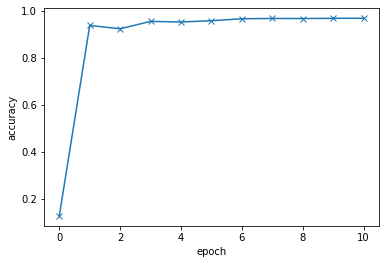

In [ ]:
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [ ]:
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=ToTensor())

In [ ]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


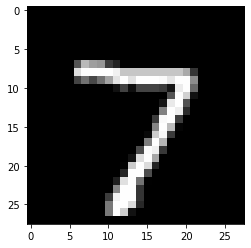

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 2


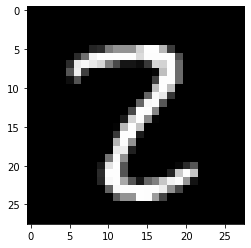

In [ ]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size=256), device)
result = evaluate(model, F.cross_entropy, test_loader, metric=accuracy)
result

(0.10599219199717044, 10000, 0.9693)

## CNN

In [ ]:
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader

In [ ]:
project_name='05-cifar10-cnn'

In [ ]:
# Dowload the dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

  0%|          | 0/135107811 [00:00<?, ?it/s]

In [ ]:
# Extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

In [ ]:
data_dir = './data/cifar10'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['deer', 'horse', 'bird', 'ship', 'dog', 'airplane', 'truck', 'cat', 'frog', 'automobile']


In [ ]:
airplane_files = os.listdir(data_dir + "/train/airplane")
print('No. of training examples for airplanes:', len(airplane_files))
print(airplane_files[:5])

No. of training examples for airplanes: 5000
['2779.png', '1646.png', '3754.png', '3445.png', '3626.png']


In [ ]:
ship_test_files = os.listdir(data_dir + "/test/ship")
print("No. of test examples for ship:", len(ship_test_files))
print(ship_test_files[:5])

No. of test examples for ship: 1000
['0539.png', '0032.png', '0550.png', '0047.png', '0373.png']


In [ ]:
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

In [ ]:
len(dataset)

50000

In [ ]:
img, label = dataset[0]
print(img.shape, label)

torch.Size([3, 32, 32]) 0


In [ ]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  airplane (0)


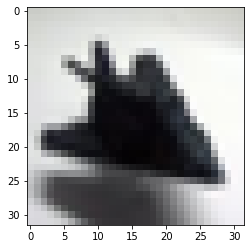

In [ ]:
show_example(*dataset[0])

Label:  airplane (0)


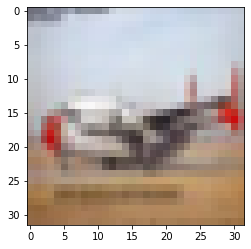

In [ ]:
show_example(*dataset[1099])

In [ ]:
random_seed = 42
torch.manual_seed(random_seed);

In [ ]:
val_size = 5000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [ ]:
batch_size=128

In [ ]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=2, pin_memory=True)

In [ ]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

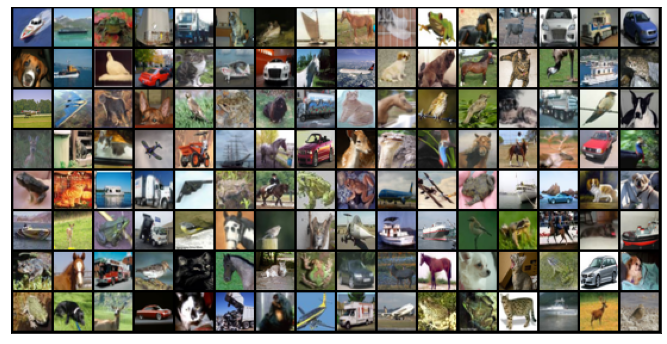

In [ ]:
show_batch(train_dl)

In [ ]:
def apply_kernel(image, kernel):
    ri, ci = image.shape       # image dimensions
    rk, ck = kernel.shape      # kernel dimensions
    ro, co = ri-rk+1, ci-ck+1  # output dimensions
    output = torch.zeros([ro, co])
    for i in range(ro): 
        for j in range(co):
            output[i,j] = torch.sum(image[i:i+rk,j:j+ck] * kernel)
    return output

In [ ]:
sample_image = torch.tensor([
    [3, 3, 2, 1, 0], 
    [0, 0, 1, 3, 1], 
    [3, 1, 2, 2, 3], 
    [2, 0, 0, 2, 2], 
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2], 
    [2, 2, 0], 
    [0, 1, 2]
], dtype=torch.float32)

apply_kernel(sample_image, sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

In [ ]:
simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2,2)
)

In [ ]:
for images, labels in train_dl:
  print('images.shape:', images.shape)
  out = simple_model(images)
  print('out.shape:', out.shape)
  break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 8, 16, 16])


In [ ]:
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), #output: bs * 16 * 16 * 16

    nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), #output: bs * 16 * 8 * 8

    nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), #output: bs * 16 * 4 * 4

    nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), #output: bs * 16 * 2 * 2

    nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), #output: bs * 16 * 1 * 1

    nn.Flatten(), #output: bs * 16
    nn.Linear(256, 10) #output: bs * 10
)

In [ ]:
for images, labels in train_dl:
  print('images.shape:', images.shape)
  out = model(images)
  print('out.shape:', out.shape)
  print('out[0]:', out[0])
  break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 10])
out[0]: tensor([-0.0457,  0.0266,  0.0711, -0.0215, -0.0029,  0.0293,  0.0535,  0.0500,
        -0.0216,  0.0422], grad_fn=<SelectBackward0>)


In [ ]:
F.softmax(out[0], dim=0)

tensor([0.0938, 0.1008, 0.1054, 0.0960, 0.0979, 0.1011, 0.1035, 0.1032, 0.0960,
        0.1024], grad_fn=<SoftmaxBackward0>)

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()

In [ ]:
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=256, out_features=10, bias=True)
)

In [ ]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
  #Generate predictions
  preds = model(xb)
  #Calculate loss
  loss = loss_func(preds, yb)

  if opt is not None:
    #Compute gradients
    loss.backward()
    #update parameters
    opt.step()
    #Reset Gradients
    opt.zero_grad()

  metric_result = None
  if metric is not None:
    #compute the metric
    metric_result = metric(preds, yb)

  return loss.item(), len(xb), metric_result

In [ ]:
def evaluate(model, loss_fn, valid_dl, metric=None):
  with torch.no_grad():
    #pass each batch through the model
    results = [loss_batch(model, loss_fn, xb, yb, metric=metric) for xb, yb in valid_dl]
    #separate losses, counts and metrics
    losses, nums, metrics = zip(*results)
    #Total size of the dataset
    total = np.sum(nums)
    #Avg. loss across batches
    avg_loss = np.sum(np.multiply(losses, nums))/total
    avg_metric = None

    if metric is not None:
      #Avg of metric across batches
      avg_metric = np.sum(np.multiply(metrics, nums)) / total

    return avg_loss, total, avg_metric

In [ ]:
def fit(epochs, model, loss_fn, train_dl, valid_dl, lr=None, metric=None, opt_fn=None):
  train_losses, val_losses, val_metrics = [], [], []

  #instantiate the optimizer
  if opt_fn is None: opt_fn = torch.optim.SGD
  opt = opt_fn(model.parameters(), lr=lr)

  for epoch in range(epochs):
    #Training
    model.train()
    for xb, yb in train_dl:
      train_loss, _, _ = loss_batch(model, loss_fn, xb, yb, opt)

    #Evaluation
    model.eval()
    result = evaluate(model, loss_fn, valid_dl, metric)
    val_loss, total, val_metric = result

    #Record the loss and metric
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_metrics.append(val_metric)

    #Print progress:
    if metric is None:
      print('Epoch [{}/{}], Train_loss: {:.4f}, Val_loss: {:.4f}'.format(epoch+1, epochs, train_loss, val_loss))

    else:
      print('Epoch [{}/{}], Train_loss: {:.4f}, Val_loss: {:.4f}, {}: {:.4f}'.format(epoch+1, epochs, train_loss, val_loss, metric.__name__, val_metric))

  return train_losses, val_losses, val_metrics

In [ ]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.sum(preds == labels).item() / len(preds)

In [ ]:
val_loss, _, val_acc = evaluate(model, F.cross_entropy, val_dl, metric=accuracy)

In [ ]:
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))

Loss: 2.3043, Accuracy: 0.1014


In [ ]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.005

In [ ]:
history = fit(num_epochs, model, F.cross_entropy, train_dl, val_dl, lr, accuracy, opt_func)

Epoch [1/10], Train_loss: 1.3794, Val_loss: 1.5825, accuracy: 0.4270
Epoch [2/10], Train_loss: 1.3550, Val_loss: 1.2404, accuracy: 0.5632
Epoch [3/10], Train_loss: 1.2759, Val_loss: 1.2060, accuracy: 0.5812
Epoch [4/10], Train_loss: 1.0291, Val_loss: 1.2142, accuracy: 0.5630
Epoch [5/10], Train_loss: 0.6920, Val_loss: 1.0716, accuracy: 0.6242
Epoch [6/10], Train_loss: 1.0434, Val_loss: 1.0712, accuracy: 0.6198
Epoch [7/10], Train_loss: 1.0184, Val_loss: 1.0617, accuracy: 0.6294
Epoch [8/10], Train_loss: 0.7849, Val_loss: 1.0228, accuracy: 0.6432
Epoch [9/10], Train_loss: 0.7776, Val_loss: 1.0226, accuracy: 0.6528
Epoch [10/10], Train_loss: 0.8507, Val_loss: 1.0281, accuracy: 0.6422


In [ ]:
train_losses, val_losses, val_metrics = history

In [ ]:
def plot_accuracies(val_metrics):
    #accuracies = [x['val_metrics'] for x in history]
    plt.plot(val_metrics, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

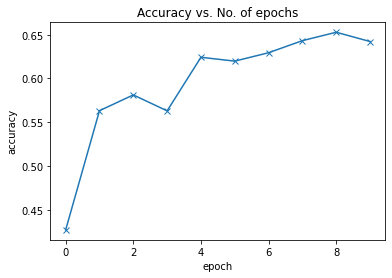

In [ ]:
plot_accuracies(val_metrics)

In [ ]:
def plot_losses(train_losses, val_losses):
    #train_losses = [x.get('train_losses') for x in history]
    #val_losses = [x['val_losses'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

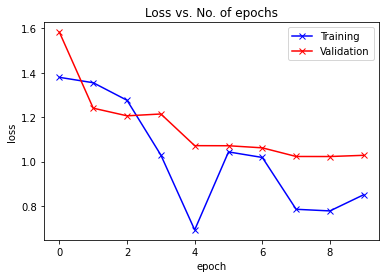

In [ ]:
plot_losses(train_losses, val_losses)

In [ ]:
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model

    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: airplane , Predicted: airplane


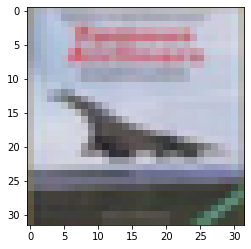

In [ ]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, F.cross_entropy, test_loader, accuracy)
result

(1.0173606249809266, 10000, 0.6515)

In [ ]:
torch.save(model.state_dict(), 'cifar10-cnn.pth')

## ResNet

In [ ]:
from torchvision.utils import make_grid

In [ ]:
# Dowload the dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

# Extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')
    
# Look into the data directory
data_dir = './data/cifar10'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

Using downloaded and verified file: ./cifar10.tgz
['test', 'train']
['deer', 'horse', 'bird', 'ship', 'dog', 'airplane', 'truck', 'cat', 'frog', 'automobile']


In [ ]:
# Data transforms (normalization & data augmentation)
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_tfms = tt.Compose([tt.RandomCrop(32, padding=4, padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         # tt.RandomRotate
                         # tt.RandomResizedCrop(256, scale=(0.5,0.9), ratio=(1, 1)), 
                         # tt.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])

In [ ]:
# PyTorch datasets
train_ds = ImageFolder(data_dir+'/train', train_tfms)
valid_ds = ImageFolder(data_dir+'/test', valid_tfms)

In [ ]:
batch_size = 256

In [ ]:
# PyTorch data loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=2, pin_memory=True)

In [ ]:
def denormalize(images, means, stds):
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        denorm_images = denormalize(images, *stats)
        ax.imshow(make_grid(denorm_images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
        break

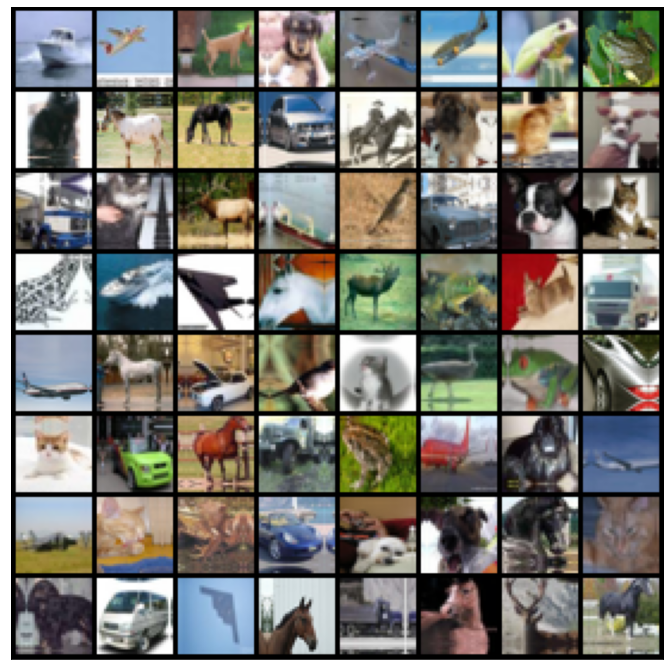

In [ ]:
show_batch(train_dl)

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [ ]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x # ReLU can be applied before or after adding the input

In [ ]:
simple_resnet = to_device(SimpleResidualBlock(), device)

for images, labels in train_dl:
    out = simple_resnet(images)
    print(out.shape)
    break
    
del simple_resnet, images, labels
torch.cuda.empty_cache()

torch.Size([256, 3, 32, 32])


In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [ ]:
model = to_device(ResNet9(3, 10), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
history = [evaluate(model, valid_dl)]
history

[{'val_acc': 0.09829388558864594, 'val_loss': 2.300407886505127}]

In [ ]:
epochs = 8
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [ ]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00394, train_loss: 1.4783, val_loss: 1.5826, val_acc: 0.5123
Epoch [1], last_lr: 0.00935, train_loss: 1.0907, val_loss: 0.9152, val_acc: 0.6794
Epoch [2], last_lr: 0.00972, train_loss: 0.8252, val_loss: 0.7708, val_acc: 0.7364
Epoch [3], last_lr: 0.00812, train_loss: 0.6147, val_loss: 0.6282, val_acc: 0.7877
Epoch [4], last_lr: 0.00556, train_loss: 0.5131, val_loss: 0.7221, val_acc: 0.7656
Epoch [5], last_lr: 0.00283, train_loss: 0.4063, val_loss: 0.3644, val_acc: 0.8771
Epoch [6], last_lr: 0.00077, train_loss: 0.3004, val_loss: 0.2929, val_acc: 0.8983
Epoch [7], last_lr: 0.00000, train_loss: 0.2103, val_loss: 0.2652, val_acc: 0.9119
CPU times: user 38.5 s, sys: 4.84 s, total: 43.3 s
Wall time: 4min 12s


In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

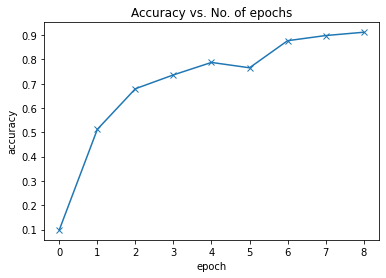

In [ ]:
plot_accuracies(history)

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

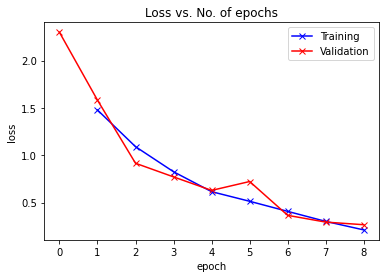

In [ ]:
plot_losses(history)

In [ ]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

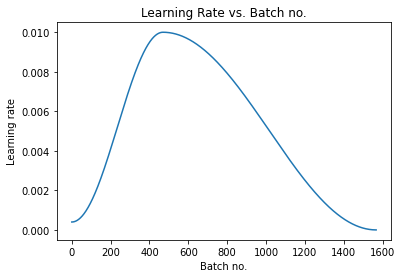

In [ ]:
plot_lrs(history)

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_ds.classes[preds[0].item()]

Label: airplane , Predicted: airplane


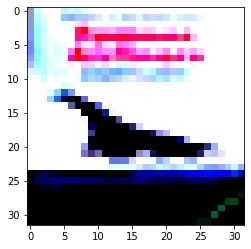

In [ ]:
img, label = valid_ds[0]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: automobile , Predicted: automobile


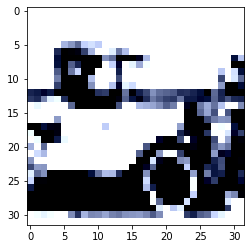

In [ ]:
img, label = valid_ds[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: frog , Predicted: frog


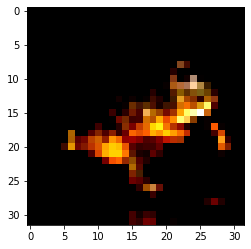

In [ ]:
img, label = valid_ds[6153]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

## GAN

In [ ]:
from torchvision.datasets import MNIST

mnist = MNIST(root='data', 
              train=True, 
              download=True,
              transform=Compose([ToTensor(), Normalize(mean=(0.5,), std=(0.5,))]))

In [ ]:
img, label = mnist[0]
print('Label: ', label)
print(img[:,10:15,10:15])
torch.min(img), torch.max(img)

Label:  5
tensor([[[-0.9922,  0.2078,  0.9843, -0.2941, -1.0000],
         [-1.0000,  0.0902,  0.9843,  0.4902, -0.9843],
         [-1.0000, -0.9137,  0.4902,  0.9843, -0.4510],
         [-1.0000, -1.0000, -0.7255,  0.8902,  0.7647],
         [-1.0000, -1.0000, -1.0000, -0.3647,  0.8824]]])


(tensor(-1.), tensor(1.))

In [ ]:
def denorm(x):
  out = (x + 1) / 2
  return out.clamp(0, 1)

Label: 5


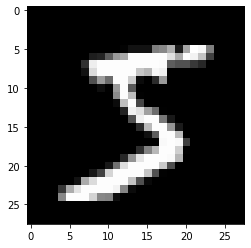

In [ ]:
%matplotlib inline

img_norm = denorm(img)
plt.imshow(img_norm[0], cmap='gray')
print('Label:', label)

In [ ]:
batch_size = 100
data_loader = DataLoader(mnist, batch_size, shuffle=True)

first batch
torch.Size([100, 1, 28, 28])
tensor([1, 7, 5, 2, 7, 2, 6, 3, 0, 2, 4, 0, 3, 5, 9, 8, 6, 6, 7, 2, 8, 2, 8, 5,
        7, 4, 4, 4, 5, 3, 6, 2, 7, 4, 4, 6, 4, 2, 7, 2, 1, 0, 8, 6, 0, 5, 8, 5,
        7, 1, 1, 6, 0, 6, 1, 4, 4, 0, 7, 6, 7, 7, 1, 5, 6, 5, 9, 9, 7, 8, 1, 9,
        1, 1, 5, 0, 6, 9, 7, 7, 7, 9, 7, 0, 3, 6, 5, 2, 9, 6, 6, 2, 0, 0, 7, 7,
        7, 7, 7, 0])


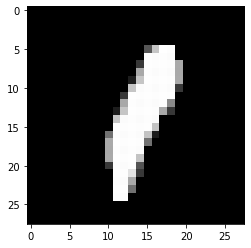

In [ ]:
for img_batch, label_batch in data_loader:
    print('first batch')
    print(img_batch.shape)
    plt.imshow(img_batch[0][0], cmap='gray')
    print(label_batch)
    break

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
device

device(type='cuda')

In [ ]:
image_size = 784
hidden_size = 256

In [ ]:
D = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid())

In [ ]:
D.to(device);

In [ ]:
latent_size = 64

In [ ]:
G = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, image_size),
    nn.Tanh())

In [ ]:
y = G(torch.randn(2, latent_size))
gen_imgs = denorm(y.reshape((-1, 28,28)).detach())

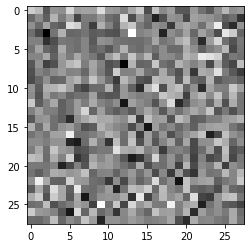

In [ ]:
plt.imshow(gen_imgs[0], cmap='gray');

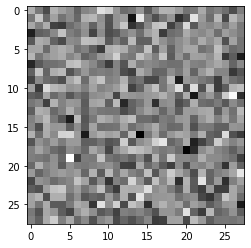

In [ ]:
plt.imshow(gen_imgs[1], cmap='gray');

In [ ]:
G.to(device);

In [ ]:
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002)

In [ ]:
def reset_grad():
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()

def train_discriminator(images):
    # Create the labels which are later used as input for the BCE loss
    real_labels = torch.ones(batch_size, 1).to(device)
    fake_labels = torch.zeros(batch_size, 1).to(device)
        
    # Loss for real images
    outputs = D(images)
    d_loss_real = criterion(outputs, real_labels)
    real_score = outputs

    # Loss for fake images
    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = G(z)
    outputs = D(fake_images)
    d_loss_fake = criterion(outputs, fake_labels)
    fake_score = outputs

    # Combine losses
    d_loss = d_loss_real + d_loss_fake
    # Reset gradients
    reset_grad()
    # Compute gradients
    d_loss.backward()
    # Adjust the parameters using backprop
    d_optimizer.step()
    
    return d_loss, real_score, fake_score

In [ ]:
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

In [ ]:
def train_generator():
    # Generate fake images and calculate loss
    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = G(z)
    labels = torch.ones(batch_size, 1).to(device)
    g_loss = criterion(D(fake_images), labels)

    # Backprop and optimize
    reset_grad()
    g_loss.backward()
    g_optimizer.step()
    return g_loss, fake_images

In [ ]:
sample_dir = 'samples'
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

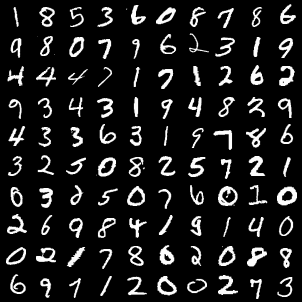

In [ ]:
# Save some real images
for images, _ in data_loader:
    images = images.reshape(images.size(0), 1, 28, 28)
    save_image(denorm(images), os.path.join(sample_dir, 'real_images.png'), nrow=10)
    break
   
Image(os.path.join(sample_dir, 'real_images.png'))

Saving fake_images-0000.png


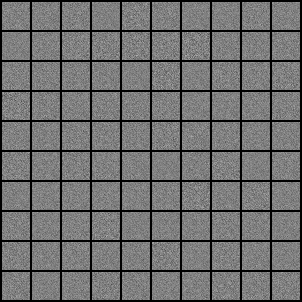

In [ ]:
sample_vectors = torch.randn(batch_size, latent_size).to(device)

def save_fake_images(index):
    fake_images = G(sample_vectors)
    fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
    fake_fname = 'fake_images-{0:0=4d}.png'.format(index)
    print('Saving', fake_fname)
    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=10)
    
# Before training
save_fake_images(0)
Image(os.path.join(sample_dir, 'fake_images-0000.png'))

In [ ]:
%%time

num_epochs = 150
total_step = len(data_loader)
d_losses, g_losses, real_scores, fake_scores = [], [], [], []

for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        # Load a batch & transform to vectors
        images = images.reshape(batch_size, -1).to(device)
        
        # Train the discriminator and generator
        d_loss, real_score, fake_score = train_discriminator(images)
        g_loss, fake_images = train_generator()
        
        # Inspect the losses
        if (i+1) % 200 == 0:
            d_losses.append(d_loss.item())
            g_losses.append(g_loss.item())
            real_scores.append(real_score.mean().item())
            fake_scores.append(fake_score.mean().item())
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
                  .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(), 
                          real_score.mean().item(), fake_score.mean().item()))
        
    # Sample and save images
    save_fake_images(epoch+1)

Epoch [0/150], Step [200/600], d_loss: 0.0364, g_loss: 4.3109, D(x): 0.99, D(G(z)): 0.03
Epoch [0/150], Step [400/600], d_loss: 0.0776, g_loss: 5.1492, D(x): 0.97, D(G(z)): 0.04
Epoch [0/150], Step [600/600], d_loss: 0.2053, g_loss: 4.2036, D(x): 0.89, D(G(z)): 0.06
Saving fake_images-0001.png
Epoch [1/150], Step [200/600], d_loss: 0.0458, g_loss: 5.4800, D(x): 1.00, D(G(z)): 0.04
Epoch [1/150], Step [400/600], d_loss: 0.7736, g_loss: 3.3341, D(x): 0.76, D(G(z)): 0.27
Epoch [1/150], Step [600/600], d_loss: 0.1436, g_loss: 4.3453, D(x): 0.98, D(G(z)): 0.10
Saving fake_images-0002.png
Epoch [2/150], Step [200/600], d_loss: 0.2998, g_loss: 3.0526, D(x): 0.87, D(G(z)): 0.08
Epoch [2/150], Step [400/600], d_loss: 0.6021, g_loss: 3.9654, D(x): 0.81, D(G(z)): 0.17
Epoch [2/150], Step [600/600], d_loss: 0.7569, g_loss: 2.6031, D(x): 0.80, D(G(z)): 0.21
Saving fake_images-0003.png
Epoch [3/150], Step [200/600], d_loss: 0.6269, g_loss: 2.0999, D(x): 0.83, D(G(z)): 0.22
Epoch [3/150], Step [400/6

In [ ]:
# Save the model checkpoints 
torch.save(G.state_dict(), 'G.ckpt')
torch.save(D.state_dict(), 'D.ckpt')

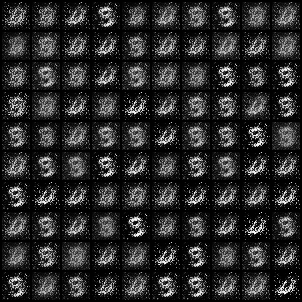

In [ ]:
Image('./samples/fake_images-0010.png')

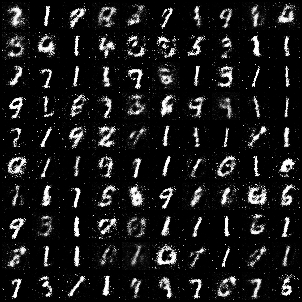

In [ ]:
Image('./samples/fake_images-0050.png')

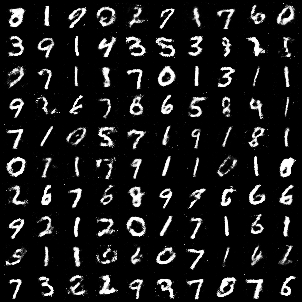

In [ ]:
Image('./samples/fake_images-0150.png')

In [ ]:
vid_fname = 'gans_training.avi'

files = [os.path.join(sample_dir, f) for f in os.listdir(sample_dir) if 'fake_images' in f]
files.sort()

out = cv2.VideoWriter(vid_fname,cv2.VideoWriter_fourcc(*'MP4V'), 8, (302,302))
[out.write(cv2.imread(fname)) for fname in files]
out.release()
FileLink('gans_training.avi')

/content/gans_training.avi

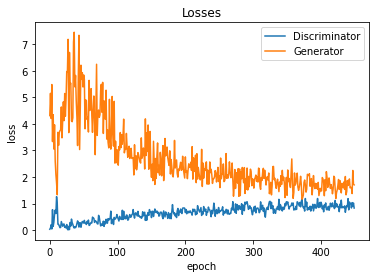

In [ ]:
plt.plot(d_losses, '-')
plt.plot(g_losses, '-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Discriminator', 'Generator'])
plt.title('Losses');

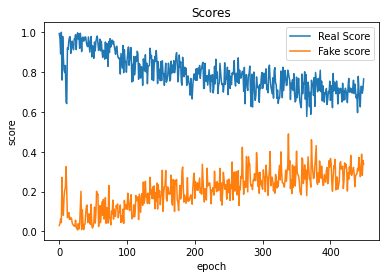

In [ ]:
plt.plot(real_scores, '-')
plt.plot(fake_scores, '-')
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend(['Real Score', 'Fake score'])
plt.title('Scores');

## Practise

In [ ]:
a = torch.FloatTensor(2, 3, 1, 1)

In [ ]:
a

tensor([[[[6.4884e-30]],

         [[0.0000e+00]],

         [[3.7835e-44]]],


        [[[0.0000e+00]],

         [[       nan]],

         [[1.9205e+31]]]])

In [ ]:
a.size(0)

2

In [ ]:
a.view(a.size(0), -1)

tensor([[6.4884e-30, 0.0000e+00, 3.7835e-44],
        [0.0000e+00,        nan, 1.9205e+31]])

In [ ]:
3//2

1

In [ ]:
a = torch.FloatTensor(2, 3)
b = torch.FloatTensor(2, 3)

In [ ]:
a

tensor([[-1.4513e-01,  0.0000e+00,  3.7835e-44],
        [ 0.0000e+00,         nan,  1.9205e+31]])

In [ ]:
b

tensor([[-1.4505e-01,  0.0000e+00,  1.9205e+31],
        [ 0.0000e+00, -1.0197e-01,  0.0000e+00]])

In [ ]:
c = a.add_(b)

In [ ]:
c

tensor([[-2.9018e-01,  0.0000e+00,  1.9205e+31],
        [ 0.0000e+00,         nan,  1.9205e+31]])

In [ ]:
a +b

tensor([[-4.3523e-01,  0.0000e+00,  3.8409e+31],
        [ 0.0000e+00,         nan,  1.9205e+31]])

In [5]:
def conv_2d(ni, nf, stride=1, ks=3):
  return nn.Conv2d(in_channels=ni, out_channels=nf, kernel_size=ks, stride=stride, padding=ks//2, bias=False)

def bn_relu_conv(ni, nf):
  return nn.Sequential(nn.BatchNorm2d(ni), 
                       nn.ReLU(inplace=True),
                       conv_2d(ni, nf))

In [6]:
class ResBlock(nn.Module):
  def __init__(self, ni, nf, stride=1):
    super().__init__()
    self.bn = nn.BatchNorm2d(ni)
    self.conv1 = conv_2d(ni, nf, stride)
    self.conv2 = bn_relu_conv(nf, nf)
    self.shortcut = lambda x: x
    if ni != nf:
      self.shortcut = conv_2d(ni, nf, stride, 1)

  def forward(self, x):
    x = F.relu(self.bn(x), inplace=True)
    r = self.shortcut(x)
    x = self.conv1(x)
    x = self.conv2(x) * 0.2
    return x.add_(r)

In [7]:
def make_group(N, ni, nf, stride):
  start = ResBlock(ni, nf, stride)
  rest = [ResBlock(nf, nf) for j in range(1, N)]
  return [start] + rest

In [8]:
class Flatten(nn.Module):
  def __init__(self):
    super().__init__()
  def forward(self, x):
    return x.view(x.size(0), -1)

In [9]:
class MyResNet50(nn.Module):
  def __init__(self, n_groups, N, n_classes, k=1, n_start=16):
    super().__init__()
    #Increase channels
    layers = [conv_2d(3, n_start)]
    n_channels = [n_start]

    #Add groups
    for i in range(n_groups):
      n_channels.append(n_start*(2**i)*k)
      stride = 2 if i>0 else 1
      layers += make_group(N, n_channels[i], n_channels[i+1], stride)

    #Pool, Flatten, and add linear layer for classification  
    layers += [nn.BatchNorm2d(n_channels[3]),
                 nn.ReLU(inplace=True),
                 nn.AdaptiveAvgPool2d(1),
                 Flatten(),
                 nn.Linear(n_channels[3], n_classes)]
    
    self.features = nn.Sequential(*layers)

  def forward(self, x):
    return self.features(x)

In [10]:
model = MyResNet50(n_groups=3, N=3, n_classes=10, k=6)

In [11]:
model

MyResNet50(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ResBlock(
      (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(16, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (conv2): Sequential(
        (0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): ReLU(inplace=True)
        (2): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (shortcut): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
    (2): ResBlock(
      (bn): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (conv2): Sequential(
        (0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1)

In [12]:
def conv_2d(ni, nf, ks, stride=1):
  return nn.Conv2d(in_channels=ni, out_channels=nf, kernel_size=ks, stride=stride, padding=ks//2, bias=False)

def bn_relu_conv(ni, nf, ks):
  return nn.Sequential(nn.BatchNorm2d(ni), 
                       nn.ReLU(inplace=True),
                       conv_2d(ni, nf, ks))

In [ ]:
class ResBlock(nn.Module):
  def __init__(self, ni, nf, ks, stride=1):
    super().__init__()
    self.bn = nn.BatchNorm2d(ni)
    self.conv1 = conv_2d(ni, ni, 1, stride)
    self.conv2 = bn_relu_conv(ni, ni, ks=3)
    self.conv3 = bn_relu_conv(ni, nf, ks=1)
    #self.shortcut = lambda x: x
    #if ni != nf:
    self.shortcut = conv_2d(ni, nf, 1, 1)

  def forward(self, x):
    x = F.relu(self.bn(x), inplace=True)
    r = self.shortcut(x)
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x) * 0.2
    return x.add_(r)

In [ ]:
def conv_2d(ni, nf, ks, stride=1):
    return nn.Conv2d(in_channels=ni, out_channels=nf, kernel_size=ks, stride=stride, padding=ks//2, bias=False)

def bn_relu_conv(ni, nf, ks):
    return nn.Sequential(nn.BatchNorm2d(ni), 
                       nn.ReLU(inplace=True),
                       conv_2d(ni, nf, ks))

In [ ]:
class ResBlock(nn.Module):
    def __init__(self, ni, nf, stride=1):
        super().__init__()
        self.bn = nn.BatchNorm2d(ni)
        self.conv1 = conv_2d(ni, ni, 1, stride)
        self.conv2 = bn_relu_conv(ni, ni, ks=3)
        self.conv3 = bn_relu_conv(ni, nf, ks=1)
        self.shortcut = lambda x: x
        if ni != nf:
            self.shortcut = conv_2d(ni, nf, 1, 1)

    def forward(self, x):
        x = F.relu(self.bn(x), inplace=True)
        r = self.shortcut(x)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x) * 0.2
        return x.add_(r)

In [ ]:
class ResBlock2(nn.Module):
    def __init__(self, ni, nf, stride=1):
        super().__init__()
        self.bn = nn.BatchNorm2d(ni)
        self.conv1 = conv_2d(ni, nf, 1, stride)
        self.conv2 = bn_relu_conv(nf, nf, ks=3)
        self.conv3 = bn_relu_conv(nf, ni, ks=1)
        self.shortcut = lambda x: x
#        if ni != nf:
#            self.shortcut = conv_2d(ni, nf, 1, 1)

    def forward(self, x):
        x = F.relu(self.bn(x), inplace=True)
        r = self.shortcut(x)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x) * 0.2
        return x.add_(r)

In [ ]:
def make_group(N, ni, nf, stride):
    start = ResBlock(ni, nf, stride)
    rest = [ResBlock2(nf, ni) for j in range(1, N)]
    return [start] + rest

In [ ]:
class Flatten(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, x):
        return x.view(x.size(0), -1)

In [ ]:
class MyResNet50(nn.Module):
    def __init__(self, n_groups, N, n_classes, k=1, n_start=64):
        super().__init__()
        #Increase channels
        layers = [conv_2d(3, 64, ks=7, stride=2)]
        n_channels = [n_start]

        #Add groups
        for i in range(n_groups):
            n_channels.append(n_start*(2**i)*k)
            stride = 2 if i>0 else 1
            layers += make_group(N, n_channels[i], n_channels[i]*4, stride)

        #Pool, Flatten, and add linear layer for classification  
        layers += [nn.BatchNorm2d(n_channels[n_groups]*2),
                   nn.ReLU(inplace=True),
                   nn.AdaptiveAvgPool2d(1), 
                   Flatten(), 
                   nn.Linear(n_channels[n_groups]*2, n_classes)]
    
        self.features = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.features(x)

In [13]:
model = MyResNet50(n_groups=4, N=3, n_classes=10, k=2)

TypeError: conv_2d() missing 1 required positional argument: 'ks'

In [ ]:
model = to_device(MyResNet50(n_groups=4, N=3, n_classes=10, k=2), device)